<a href="https://colab.research.google.com/github/lprazeres/Forecasting-of-AUD-CNY-Exchange-Rates-Insights-for-Optimized-Procurement/blob/main/RMSE_primarymodel_prophet_years_10_years_of_AUD_CNY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools
from prophet import Prophet

Importing data

In [ ]:
df = pd.read_csv("AUD_CNY_Historical_Data_10_years.csv")

Data Cleaning and Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2610 non-null   object 
 1   Price     2610 non-null   float64
 2   Open      2610 non-null   float64
 3   High      2610 non-null   float64
 4   Low       2610 non-null   float64
 5   Vol.      1056 non-null   object 
 6   Change %  2610 non-null   object 
dtypes: float64(4), object(3)
memory usage: 142.9+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,1554
Change %,0


In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,08/01/2025,4.5607,4.5680,4.5732,4.5515,NaN,-0.06%
1,07/01/2025,4.5636,4.5743,4.6073,4.5626,NaN,-0.17%
2,06/01/2025,4.5713,4.5497,4.6111,4.5424,NaN,0.53%
3,03/01/2025,4.5471,4.5297,4.5571,4.5242,NaN,0.43%
4,02/01/2025,4.5278,4.5166,4.5427,4.5137,NaN,0.21%


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2610 non-null   datetime64[ns]
 1   Price     2610 non-null   float64       
 2   Open      2610 non-null   float64       
 3   High      2610 non-null   float64       
 4   Low       2610 non-null   float64       
 5   Vol.      1056 non-null   object        
 6   Change %  2610 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 142.9+ KB


In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-01-08,4.5607,4.5680,4.5732,4.5515,NaN,-0.06%
1,2025-01-07,4.5636,4.5743,4.6073,4.5626,NaN,-0.17%
2,2025-01-06,4.5713,4.5497,4.6111,4.5424,NaN,0.53%
3,2025-01-03,4.5471,4.5297,4.5571,4.5242,NaN,0.43%
4,2025-01-02,4.5278,4.5166,4.5427,4.5137,NaN,0.21%


In [ ]:
df = df.set_index('Date').asfreq('D').fillna(method='ffill').reset_index()
df= df[['Date', 'Price']].sort_values('Date')
df.tail()

<ipython-input-8-6e1672212e31>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.set_index('Date').asfreq('D').fillna(method='ffill').reset_index()


,Date,Price
3649,2025-01-04,4.5471
3650,2025-01-05,4.5471
3651,2025-01-06,4.5713
3652,2025-01-07,4.5636
3653,2025-01-08,4.5607


In [ ]:
result = adfuller(df['Price'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("The series is not stationary.")
else:
    print("The series is stationary.")

ADF Statistic: -3.5650377390110046
p-value: 0.006465703701830378
The series is stationary.


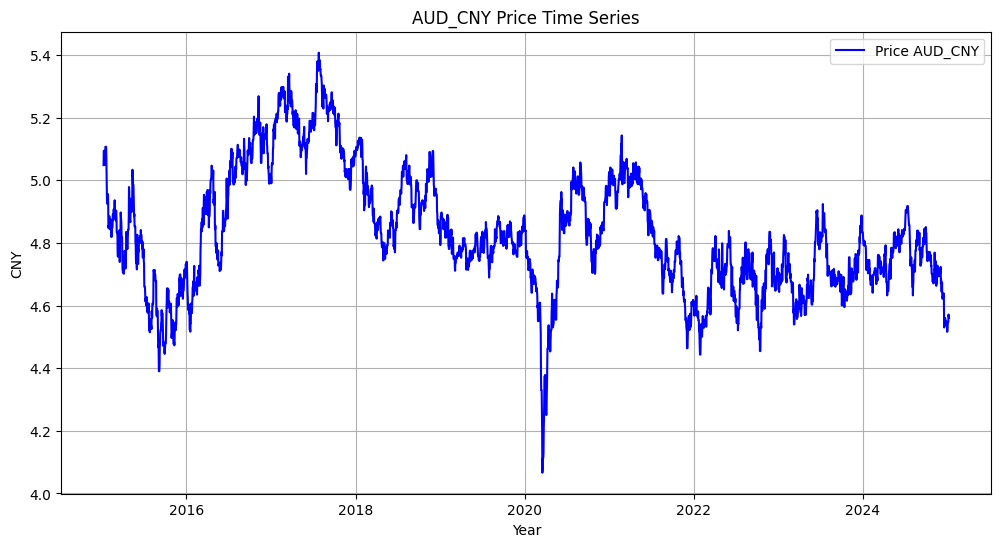

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price AUD_CNY', color='blue')
plt.title('AUD_CNY Price Time Series')
plt.xlabel('Year')
plt.ylabel('CNY')
plt.legend()
plt.grid(True)
plt.show()

Dviding between Train and Test

In [ ]:
train = df.loc[(df['Date'] >= '2015-01-08') & (df['Date'] <= '2023-01-07')]
test = df.loc[(df['Date'] >= '2023-01-08') & (df['Date'] <= '2025-01-08')]

Training the model

In [ ]:
prophet_df = df.rename(columns={'Date': 'ds', 'Price': 'y'})

In [ ]:
model = Prophet(yearly_seasonality=True)
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfux9vk8t/0li5l73j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfux9vk8t/gwlv_yos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87878', 'data', 'file=/tmp/tmpfux9vk8t/0li5l73j.json', 'init=/tmp/tmpfux9vk8t/gwlv_yos.json', 'output', 'file=/tmp/tmpfux9vk8t/prophet_model2di_zv3b/prophet_model-20250130232411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:24:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:24:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
forecast_filtered = forecast[(forecast['ds'] >= '2025-01-09') & (forecast['ds'] <= '2026-01-08')]
forecast_table = forecast_filtered[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Forecasting'})

forecast_table.head()

,Date,Forecasting
3654,2025-01-09,4.759479
3655,2025-01-10,4.758500
3656,2025-01-11,4.759626
3657,2025-01-12,4.760450
3658,2025-01-13,4.763342


In [ ]:
# Filter the forecast DataFrame to include only the dates in the test set
forecast_test = forecast[(forecast['ds'] >= test['Date'].min()) & (forecast['ds'] <= test['Date'].max())]

# Reset the index of forecast_test to match the length of the test set
forecast_test.reset_index(drop=True, inplace=True)

results = pd.DataFrame({
    'Date': test['Date'].values,
    'Actual': test['Price'].values,
    'Prediction': forecast_test['yhat'].values
})

results.tail()

,Date,Actual,Prediction
727,2025-01-04,4.5471,4.747455
728,2025-01-05,4.5471,4.749748
729,2025-01-06,4.5713,4.754337
730,2025-01-07,4.5636,4.756348
731,2025-01-08,4.5607,4.758207


In [ ]:
mse = mean_squared_error(results['Actual'], results['Prediction'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(results['Actual'], results['Prediction'])

# Exibir métricas
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 0.01
RMSE: 0.07
MAE: 0.06


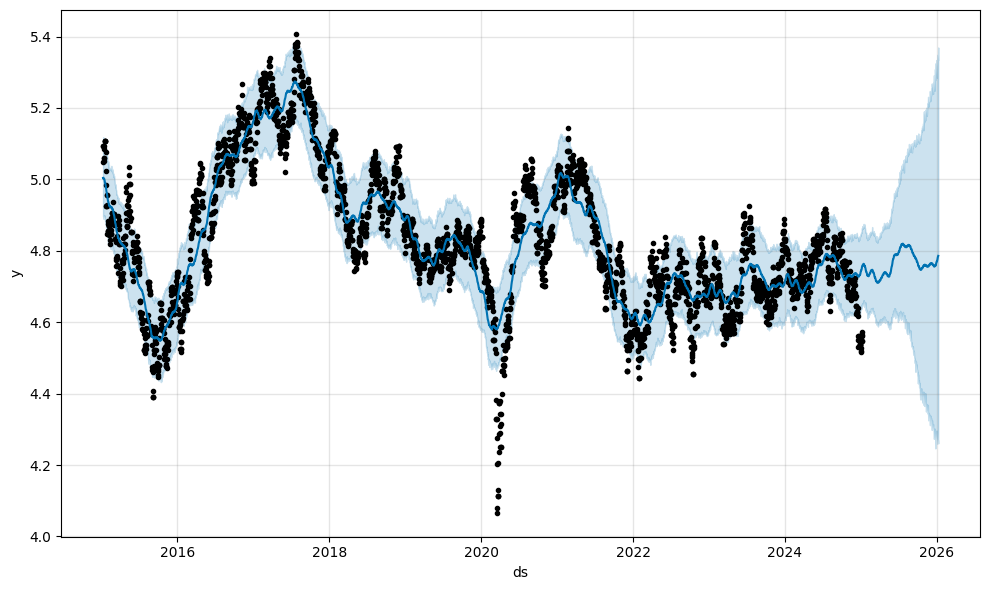

In [ ]:
model.plot(forecast)
plt.show()

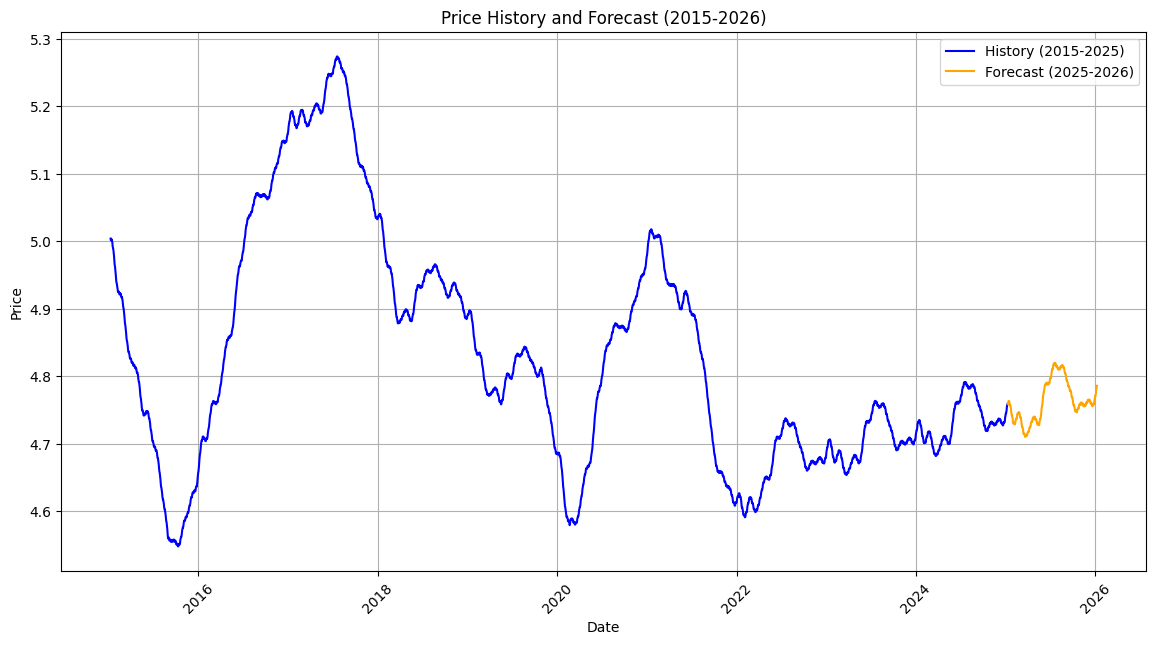

In [ ]:
historical_data = forecast[forecast['ds'] < '2025-01-09']  # Historical data (2015-2025)
forecast_data = forecast[(forecast['ds'] >= '2025-01-09') & (forecast['ds'] <= '2026-01-08')]  # Forecasts (2025-2026)


plt.figure(figsize=(14, 7))


plt.plot(historical_data['ds'], historical_data['yhat'], label='History (2015-2025)', color='blue')


plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecast (2025-2026)', color='orange')


plt.title("Price History and Forecast (2015-2026)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid()


plt.show()

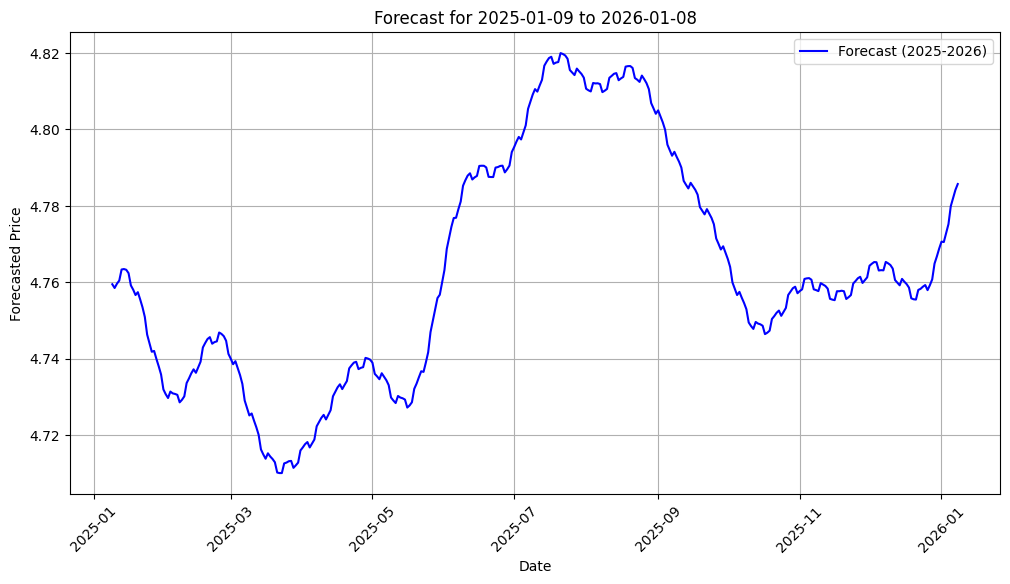

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_table['Date'], forecast_table['Forecasting'], label="Forecast (2025-2026)", color='blue')
plt.title("Forecast for 2025-01-09 to 2026-01-08")
plt.xlabel("Date")
plt.ylabel("Forecasted Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()